In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import sys
import os
import caffe
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (10, 10) 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray'

In [7]:
caffe_root = '/opt/caffe/'

In [9]:
model_definition = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'

In [10]:
model_weights = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

In [11]:
net = caffe.Net(model_definition, model_weights, caffe.TEST)

In [12]:
for layer_name, blob in net.blobs.iteritems(): 
    print layer_name + '\t' + str(blob.data.shape)

data	(10, 3, 227, 227)
conv1	(10, 96, 55, 55)
pool1	(10, 96, 27, 27)
norm1	(10, 96, 27, 27)
conv2	(10, 256, 27, 27)
pool2	(10, 256, 13, 13)
norm2	(10, 256, 13, 13)
conv3	(10, 384, 13, 13)
conv4	(10, 384, 13, 13)
conv5	(10, 256, 13, 13)
pool5	(10, 256, 6, 6)
fc6	(10, 4096)
fc7	(10, 4096)
fc8	(10, 1000)
prob	(10, 1000)


In [13]:
for layer_name, param in net.params.iteritems():
    print layer_name + '\t' + str(param[0].data.shape), str(param[1].data.shape)

conv1	(96, 3, 11, 11) (96,)
conv2	(256, 48, 5, 5) (256,)
conv3	(384, 256, 3, 3) (384,)
conv4	(384, 192, 3, 3) (384,)
conv5	(256, 192, 3, 3) (256,)
fc6	(4096, 9216) (4096,)
fc7	(4096, 4096) (4096,)
fc8	(1000, 4096) (1000,)


In [15]:
ilsvrc_mean = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
ilsvrc_mean = ilsvrc_mean.mean(1).mean(1)

In [16]:
print net.inputs

['data']


In [18]:
print net.blobs['data'].data

[[[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]]


 [[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0

In [19]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

In [20]:
transformer.set_transpose('data', (2,0,1))

In [21]:
transformer.set_mean('data', ilsvrc_mean)

In [22]:
transformer.set_raw_scale('data', 255)

In [23]:
transformer.set_channel_swap('data', (2,1,0))

In [24]:
net.blobs['data'].reshape(1,3,227, 227)

In [30]:
%ll '/root/notebooks/kapitel5'

total 5684
-rw-r--r-- 1 root  756277 Nov 26 16:57 Lagotto.ipynb
-rw-r--r-- 1 root    4603 Nov 12 13:18 README.md
-rw-r--r-- 1 root    6020 Oct  6 18:23 Untitled.ipynb
-rw-r--r-- 1 root   30229 Nov 26 17:04 caffe-net-graph.ipynb
-rw-r--r-- 1 root    4120 Nov 26 16:10 caffe2 Operatoren.ipynb
-rw-r--r-- 1 root    1758 Nov 26 17:06 caffe2-checkpoint.ipynb
-rw-r--r-- 1 root    1949 Nov 26 17:10 caffe2-cnn.ipynb
-rw-r--r-- 1 root    2195 Nov 26 16:06 caffe2-grundlagen.ipynb
-rw-r--r-- 1 root    1630 Nov 26 16:17 caffe2-nets.ipynb
-rw-r--r-- 1 root    4082 Nov 26 16:14 caffe2-operators.ipynb
-rw-r--r-- 1 root  165111 Dec 11  2016 caffenet.png
-rw-r--r-- 1 root     161 Nov 26 17:45 checkpoint
-rw-r--r-- 1 root     345 Nov 21  2016 create_hdf5_data.py
-rw-r--r-- 1 root     161 Dec 11  2016 datum.proto
-rw-r--r-- 1 root  506840 Dec 11  2016 lagotto-romagnolo.jpg
-rw-r--r-- 1 root    1169 Nov 21  2016 solver.prototxt
-rw-r--r-- 1 root  108325 Nov 26 17:31 tensorflow-bilddaten.ipynb
-rw-r--r-- 1 r

In [31]:
#image = caffe.io.load_image("lagotto-romagnolo.jpg")
image = caffe.io.load_image("/root/notebooks/kapitel5/lagotto-romagnolo.jpg")

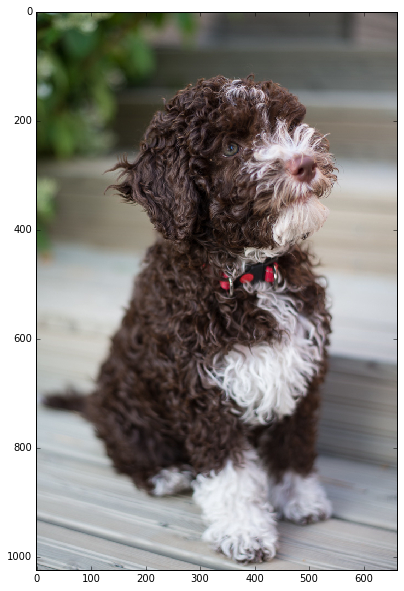

In [33]:
plt.imshow(image)

In [34]:
net.blobs['data'].data[...] = transformer.preprocess('data', image)

In [35]:
output = net.forward()

In [36]:
print net.outputs

['prob']


In [37]:
prob_output = output['prob'][0]

In [39]:
results = prob_output.argsort()
print results

[352 351 726 277 821   0 871 592 682 404 292 468 672 685 662 888 565 353
 392 833 477 320 598 730 745 563 661 395 538 627  25 399 797 579 375 687
 607 581 919 917   1 734 914 715 675 669 854 149 132 817 801 877 532 527
 274   4 706 874 442 576 800 864 895 688 727  51 893 951 561 466 632 450
 482 547 511 942 597 559 525 280 751 346 123 754 590 402 736 771 517 325
 473 635 497 340 955 465 606  55 858 446 778  27 639 312 941 431 841 742
 296 387  57 567 485 401 535 571 594 545 634 291 621 798 663  96 479 493
 313 686 436 913 964 484  64 886  89 323 388 779 546 444 612 628 963 640
 922 826 908 814 449 376 554 718 810 926 878 668 693 486 530 890 365 374
 894 681 339 408 732 869 866 623 549 144 595 698 385  72 900 526 648 717
 654 382 939 553 120 642  46 684 472  79  41 764 536 122 881 780 430 875
  44 719  26 916 777 165 844 829 512 433 625 498 548 131 930 670 790 432
 909 278 405 410 483  92 491 831 586 573 386 570 519 848 830  30 660 237
 566 425 756 705 458 516 424 934 390 859 884 847 88

In [46]:
!/opt/caffe/data/ilsvrc12/get_ilsvrc_aux.sh

Downloading...
--2017-11-26 19:44:19--  http://dl.caffe.berkeleyvision.org/caffe_ilsvrc12.tar.gz
Resolving dl.caffe.berkeleyvision.org (dl.caffe.berkeleyvision.org)... 169.229.222.251
Connecting to dl.caffe.berkeleyvision.org (dl.caffe.berkeleyvision.org)|169.229.222.251|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17858008 (17M) [application/octet-stream]
Saving to: 'caffe_ilsvrc12.tar.gz'

caffe_ilsvrc12.tar. 100%[===================>]  17.03M   118KB/s    in 2m 53s  

2017-11-26 19:47:13 (101 KB/s) - 'caffe_ilsvrc12.tar.gz' saved [17858008/17858008]

Unzipping...
Done.


In [47]:
%ll /opt/caffe/data/ilsvrc12

total 62948
-rw-r--r-- 1  502     3787 Jun  9  2014 det_synset_words.txt
-rwxr-xr-x 1 root      587 Nov 26 12:04 get_ilsvrc_aux.sh*
-rw-r--r-- 1 1006 14931117 Jul 12  2014 imagenet.bet.pickle
-rw-r--r-- 1  502   786446 Feb 25  2014 imagenet_mean.binaryproto
-rw-r--r-- 1  502    31675 Apr  8  2014 synset_words.txt
-rw-r--r-- 1  502    10000 Feb 25  2014 synsets.txt
-rw-r--r-- 1  502  3200000 Feb 25  2014 test.txt
-rw-r--r-- 1  502 43829433 Feb 25  2014 train.txt
-rw-r--r-- 1  502  1644500 Feb 25  2014 val.txt


In [48]:
label_synonyms = caffe_root + 'data/ilsvrc12/synset_words.txt'

In [49]:
class_labels = np.loadtxt(label_synonyms, str, delimiter='\t')

In [50]:
worst_result = prob_output.argmin()
best_result = prob_output.argmax()
print 'best output label:', class_labels[best_result], ' and worst output label:', class_labels[worst_result]

best output label: n02113712 miniature poodle  and worst output label: n02422699 impala, Aepyceros melampus


In [52]:
top10_results = prob_output.argsort()[::-1][:10]
zip(prob_output[top10_results], class_labels[top10_results])

[(0.52182674, 'n02113712 miniature poodle'),
 (0.23696233, 'n02113624 toy poodle'),
 (0.11212828, 'n02113799 standard poodle'),
 (0.040653031, 'n02102973 Irish water spaniel'),
 (0.01993984, 'n02102318 cocker spaniel, English cocker spaniel, cocker'),
 (0.014329934, 'n02093647 Bedlington terrier'),
 (0.010296817, 'n02102040 English springer, English springer spaniel'),
 (0.0075236624, 'n02095570 Lakeland terrier'),
 (0.0071503422, 'n02093859 Kerry blue terrier'),
 (0.0067210337, 'n02095314 wire-haired fox terrier')]

In [56]:
def vis_square(data):
    data = (data - data.min()) / (data.max() - data.min()) 
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]), (0, 1), (0, 1)) + ((0, 0),) * (data.ndim - 3))
    data = np.pad(data, padding, mode='constant', constant_values=1) 
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.imshow(data); plt.axis('off')

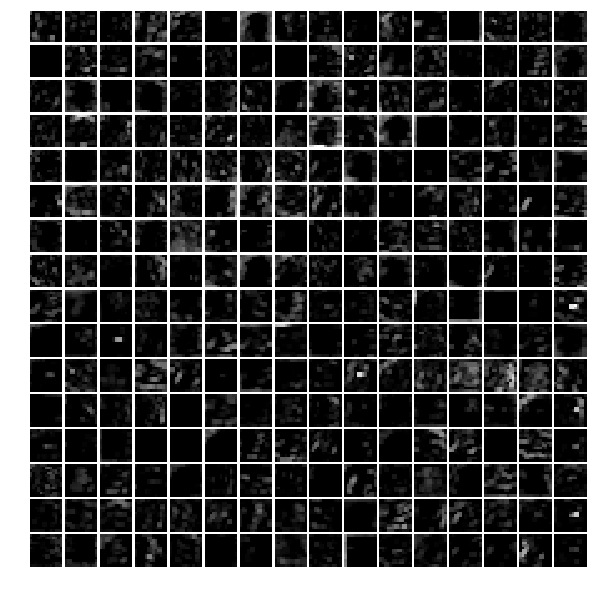

In [57]:
feat = net.blobs['pool2'].data[0]
vis_square(feat)